In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [38]:
df=pd.read_csv("C:\\Users\\SURAJ\\Downloads\\Car_Price_Prediction.csv")
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


# Split Car Name

In [39]:
df['CarName']=df['CarName'].str.lower()
df['CompanyName']= df['CarName'].apply(lambda x:x.split(' ')[0])
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo


# Fix invalid Car Name

In [40]:
def corr_name(name):
    corr={'maxda':'mazda','porsche':'procshce','Nissan':'nissan','toyota':'toyouta','vokswagen':'volkswagen','vw':'volkswagen'}
    return corr.get(name,name)
df['CompanyName']=df['CompanyName'].apply(corr_name)
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo


# Check Duplicates

In [41]:
dup=df.duplicated()
print(dup.sum())
df['CompanyName'].value_counts()

0


CompanyName
toyouta        32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
volvo          11
peugeot        11
dodge           9
buick           8
bmw             8
plymouth        7
audi            7
saab            6
isuzu           4
procshce        4
chevrolet       3
alfa-romero     3
jaguar          3
renault         2
mercury         1
porcshce        1
Name: count, dtype: int64

 # Data Visualization
 # Distribution plot with car price column

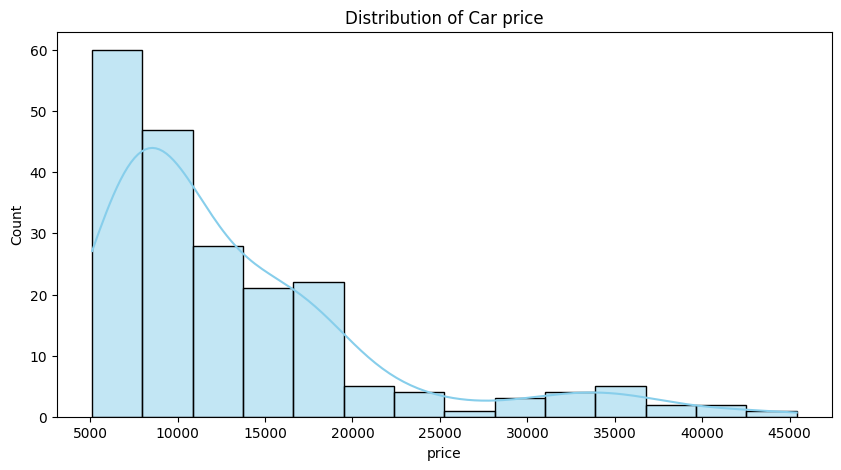

In [42]:
plt.figure(figsize=(10,5))
sns.histplot(df['price'],kde=True,color='skyblue')
plt.title('Distribution of Car price')
plt.xlabel("price")
plt.ylabel('Count')
plt.show()

# Boxplot with car price column

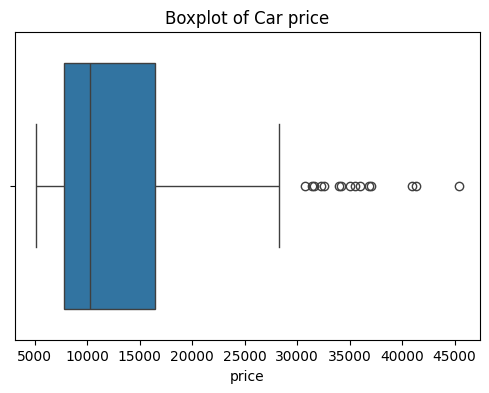

In [43]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['price'])
plt.title('Boxplot of Car price')
plt.show()

# most favoured car

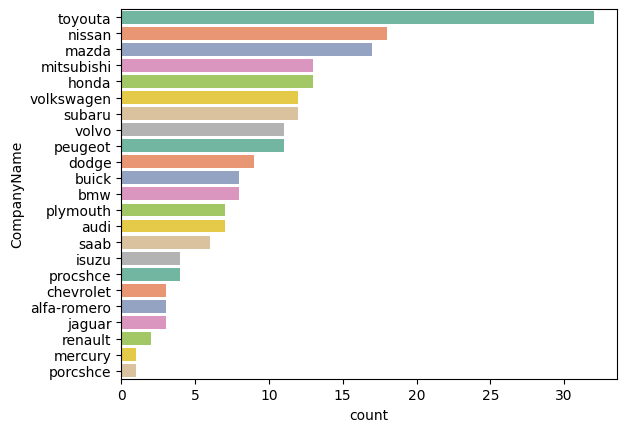

In [44]:

sns.countplot(y='CompanyName',data=df,order=df['CompanyName'].value_counts().index,palette='Set2')
plt.show()

# most car by fuel

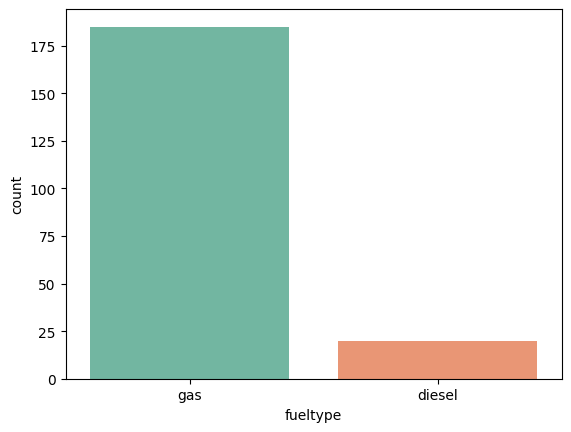

In [45]:

sns.countplot(x='fueltype',data=df,palette='Set2')
plt.show()

# most preferred car by bodytype

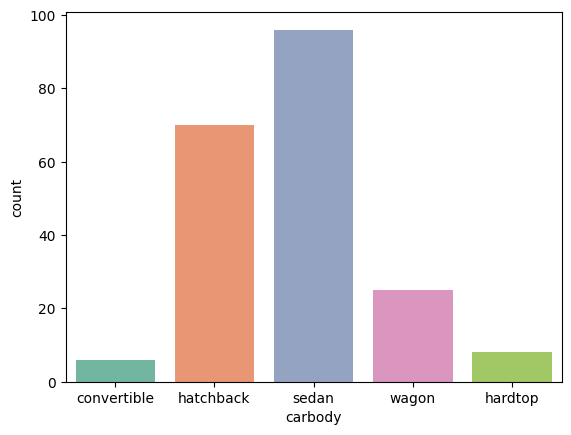

In [46]:

sns.countplot(x='carbody',data=df,palette='Set2')
plt.show()


# most favoured engin

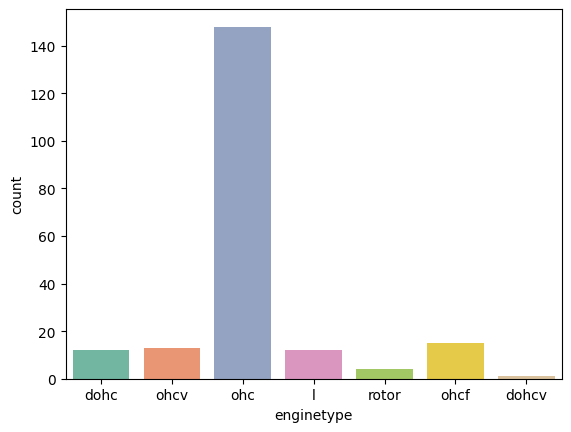

In [47]:

sns.countplot(x='enginetype',data=df,palette='Set2')
plt.show()

# Highest Average Price of Car

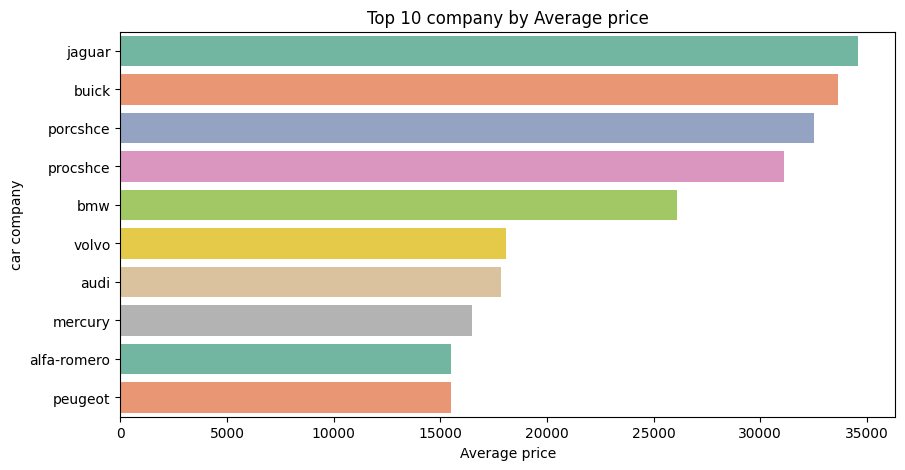

In [48]:
avg=df.groupby('CompanyName')['price'].mean().sort_values(ascending=False).head(10)
# avg.sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=avg.values,y=avg.index,palette='Set2')
plt.title('Top 10 company by Average price')
plt.xlabel("Average price")
plt.ylabel('car company')
plt.show()

# Average price by fuel type

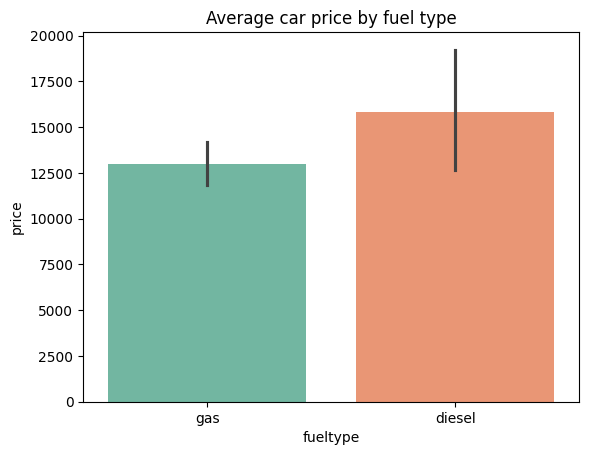

In [49]:
sns.barplot(x='fueltype',y='price',data=df,palette='Set2')
plt.title('Average car price by fuel type')
plt.show()

# most common number of cylinders

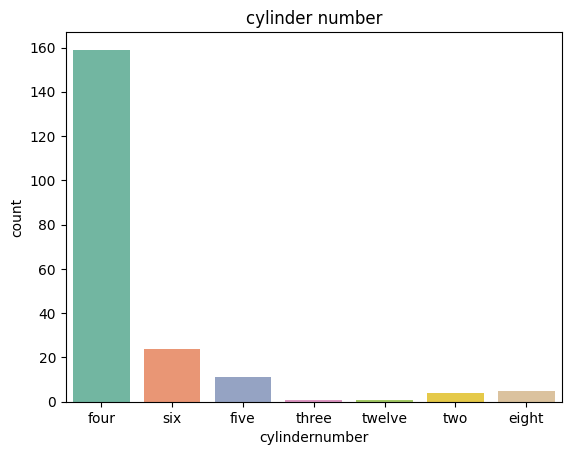

In [50]:
sns.countplot(x='cylindernumber',data=df,palette='Set2')
plt.title('cylinder number')
plt.show()

# most common fuel system

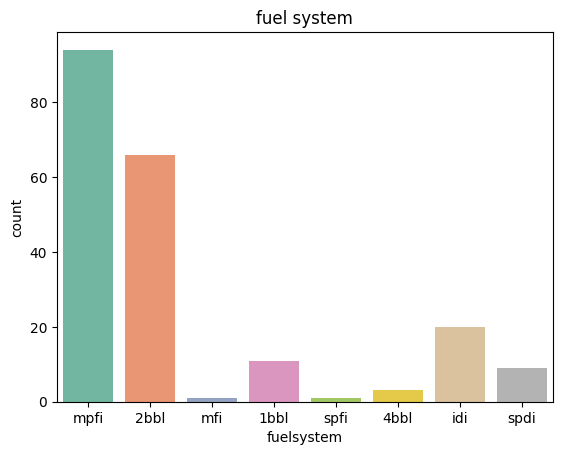

In [51]:
sns.countplot(x='fuelsystem',data=df,palette='Set2')
plt.title('fuel system')
plt.show()

# door number

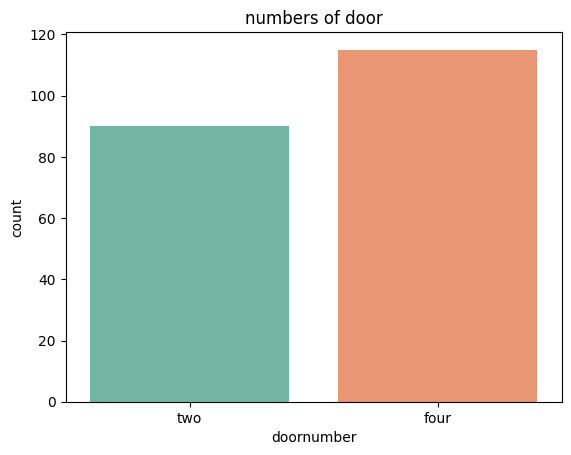

In [52]:

sns.countplot(x='doornumber',data=df,palette='Set2')
plt.title('numbers of door')
plt.show()

# Engine location

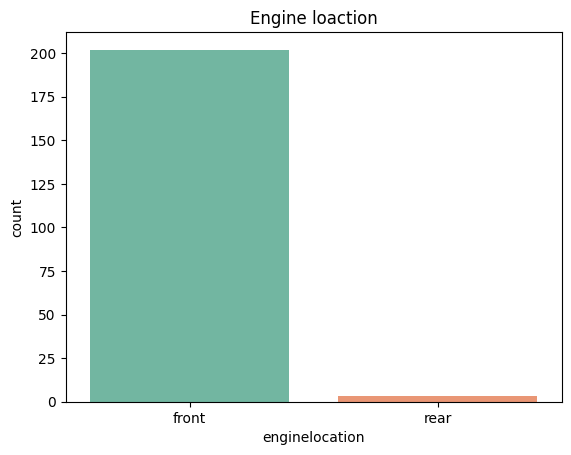

In [53]:

sns.countplot(x='enginelocation',data=df,palette='Set2')
plt.title('Engine loaction')
plt.show()

# Aspiration

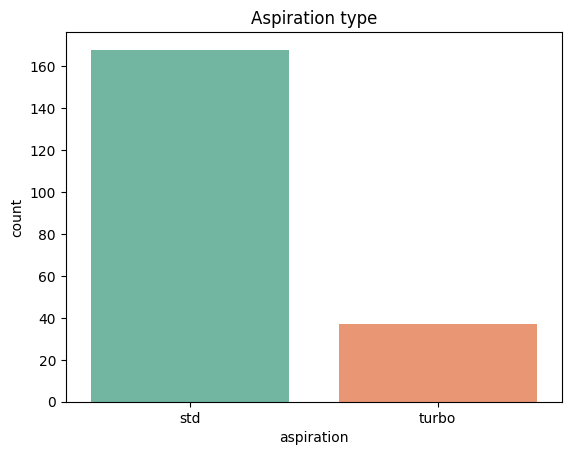

In [54]:

sns.countplot(x='aspiration',data=df,palette='Set2')
plt.title('Aspiration type')
plt.show()

# drive wheel

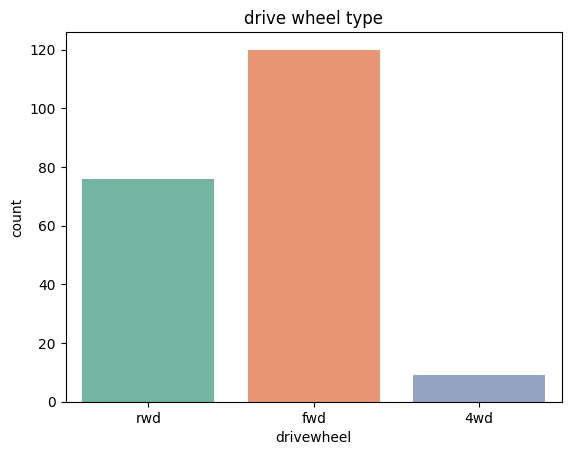

In [55]:

sns.countplot(x='drivewheel',data=df,palette='Set2')
plt.title('drive wheel type')
plt.show()

In [56]:
corr=df.corr(numeric_only=True)
corr

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443


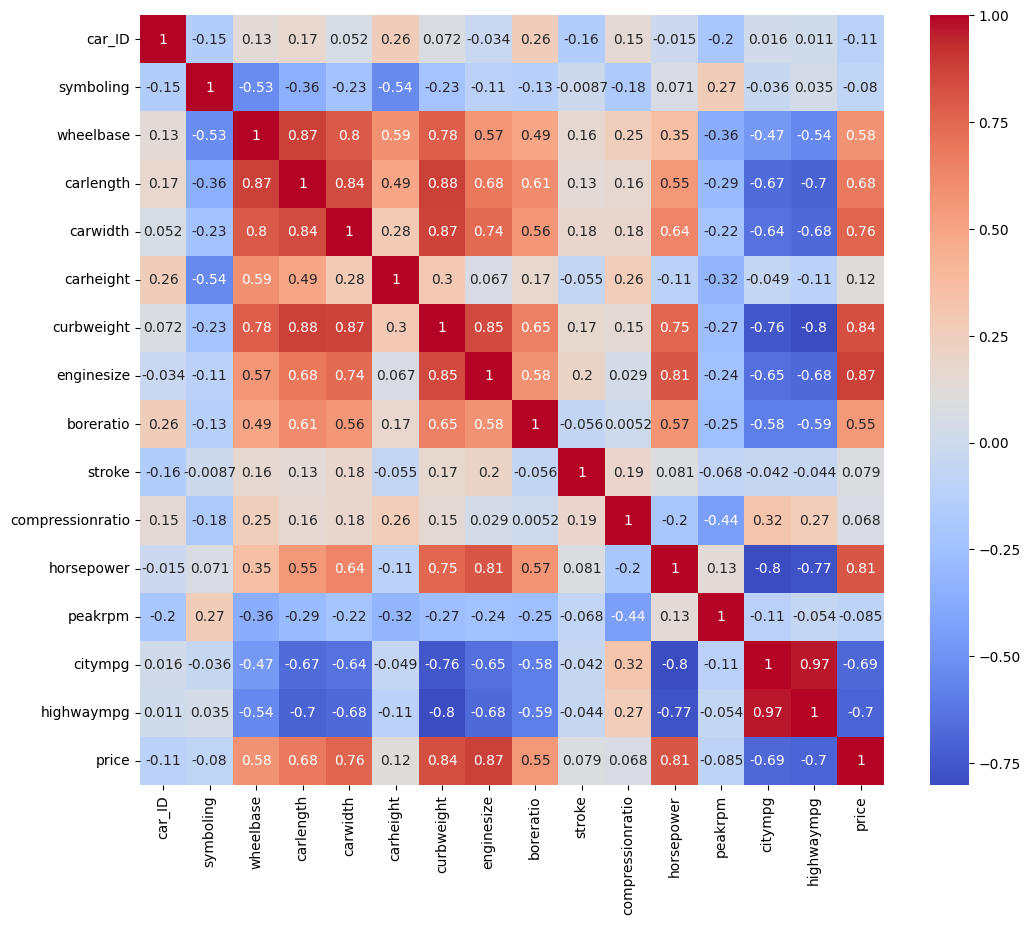

In [57]:
plt.figure(figsize=(12,10))
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.show()

# positive correlation

In [58]:
price_corr=corr['price'].sort_values(ascending=False)
price_corr[price_corr>0]

price               1.000000
enginesize          0.874145
curbweight          0.835305
horsepower          0.808139
carwidth            0.759325
carlength           0.682920
wheelbase           0.577816
boreratio           0.553173
carheight           0.119336
stroke              0.079443
compressionratio    0.067984
Name: price, dtype: float64

# Negative correlation

In [59]:
price_corr[price_corr<0]

symboling    -0.079978
peakrpm      -0.085267
car_ID       -0.109093
citympg      -0.685751
highwaympg   -0.697599
Name: price, dtype: float64

# Pair plot

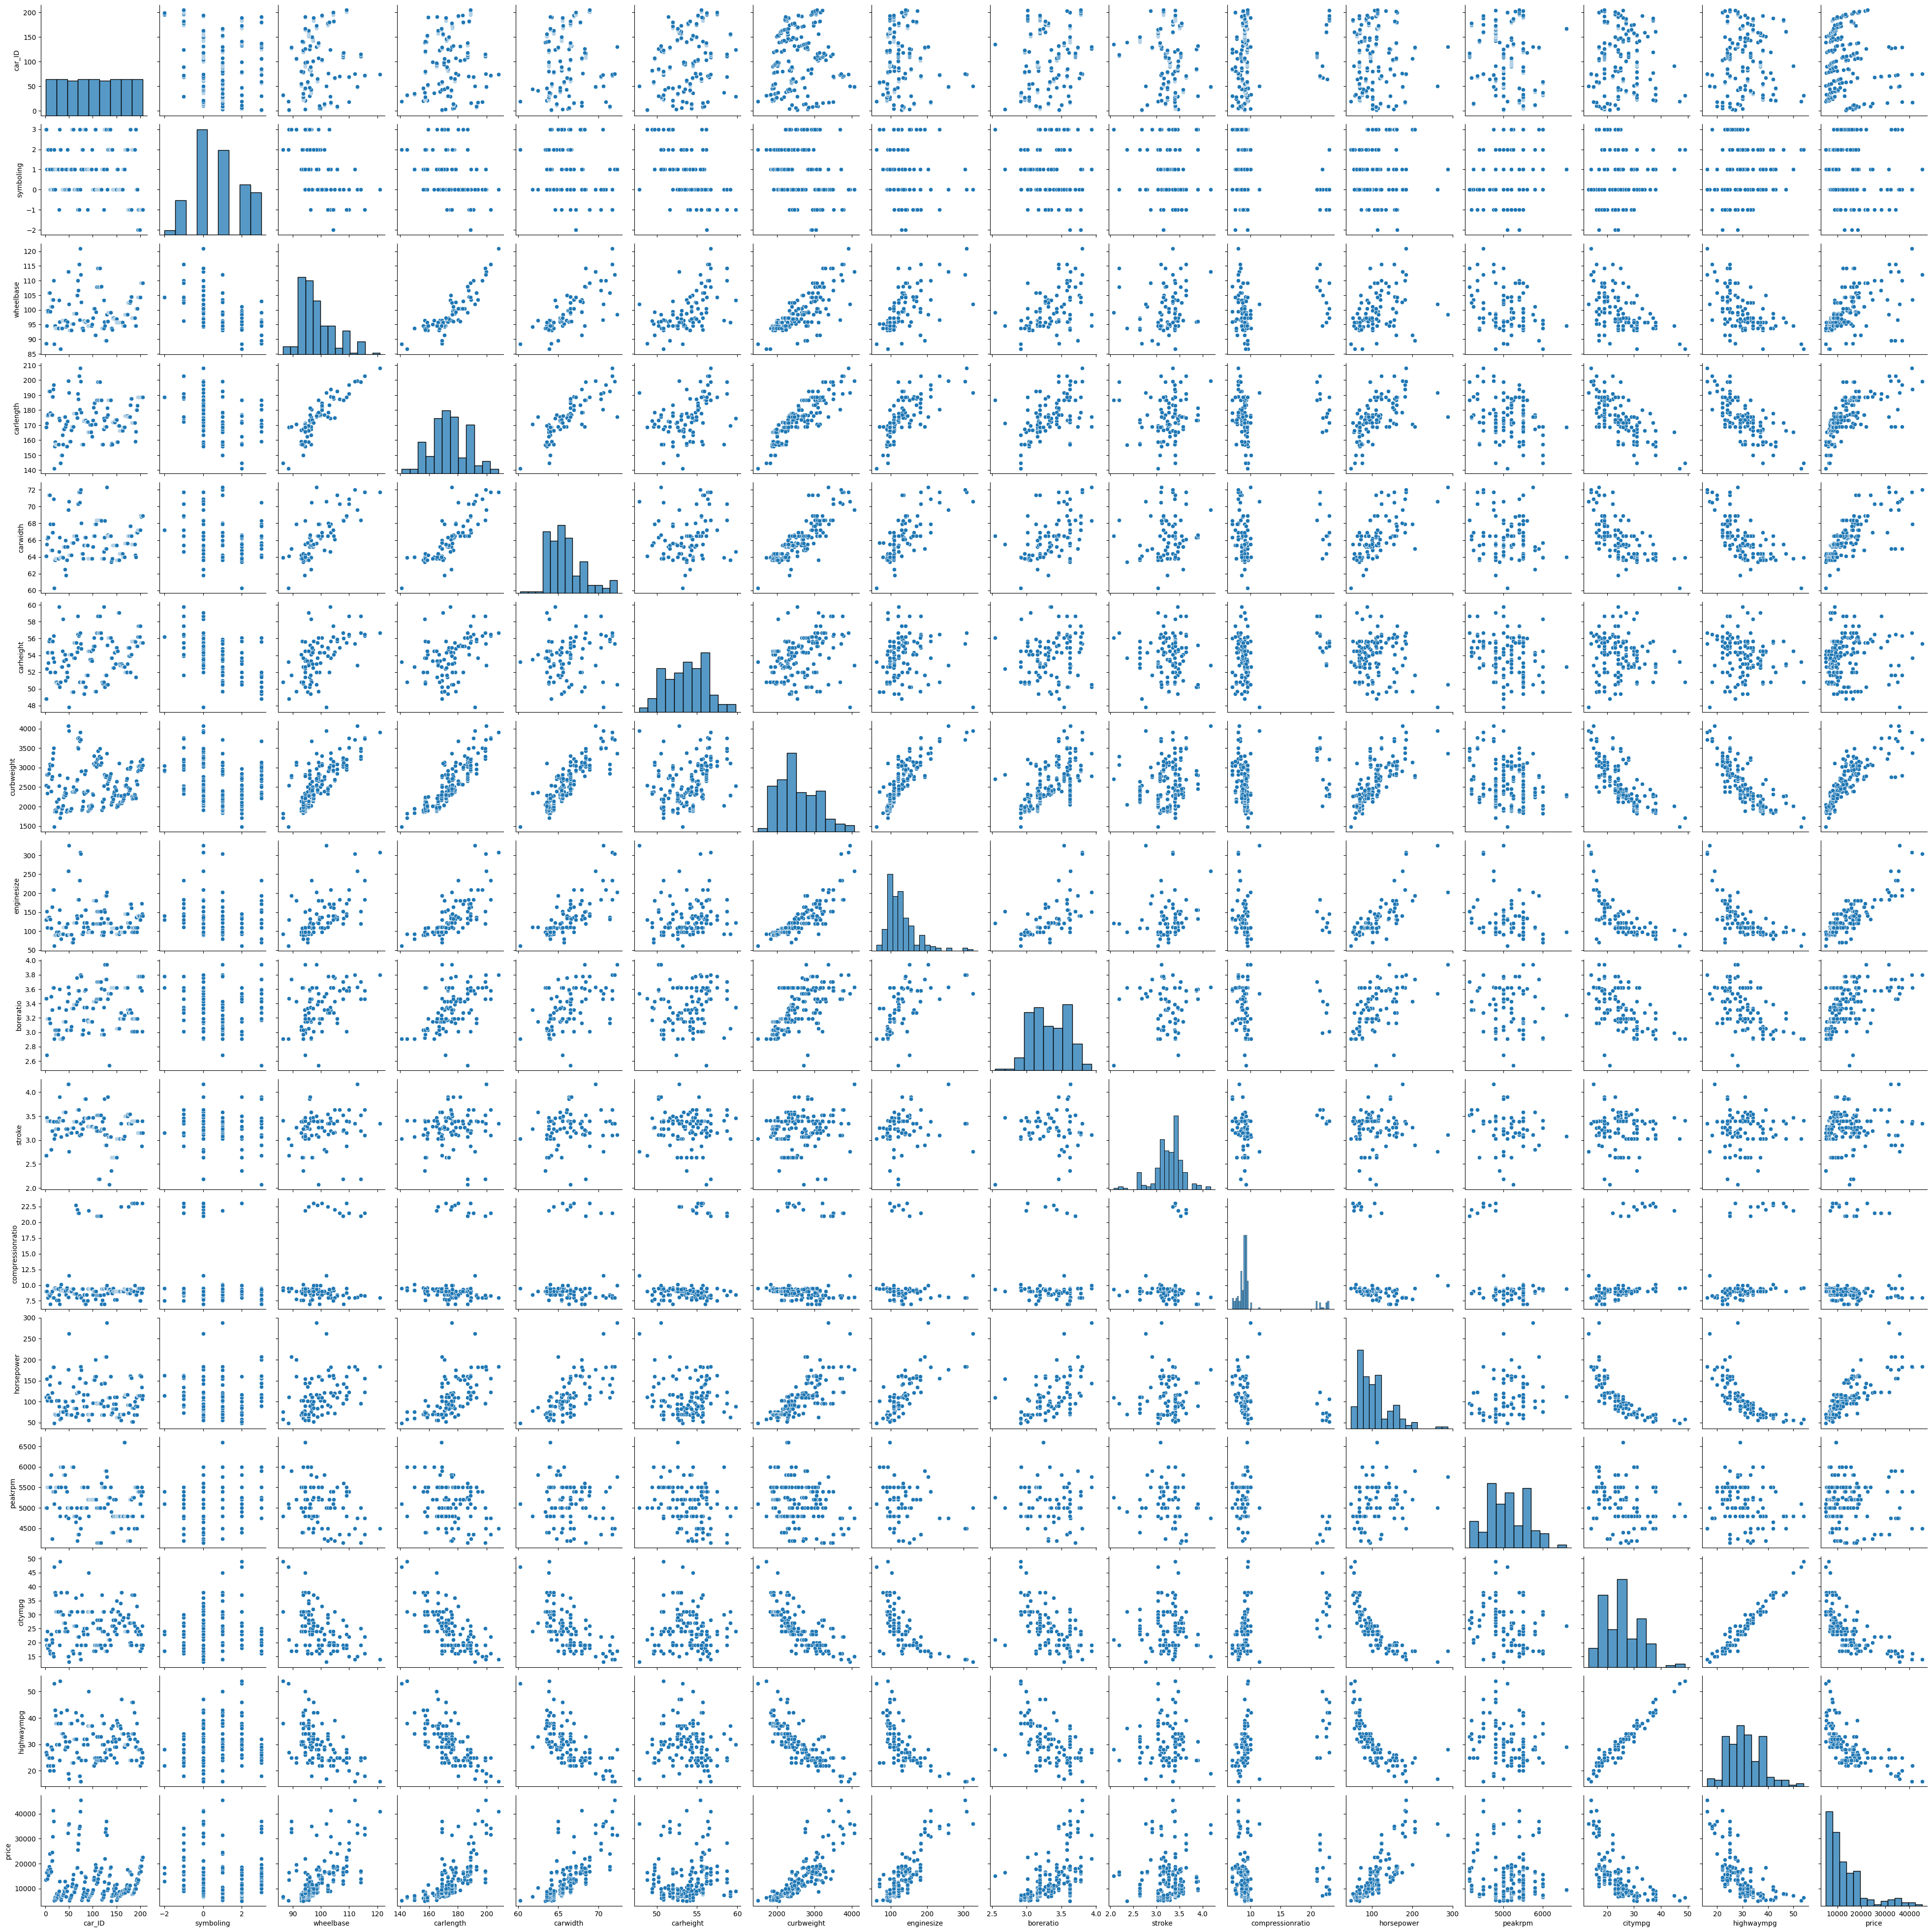

In [60]:
sns.pairplot(df)
plt.show()

# Use Linear Regression Algorithm

In [61]:
f=['enginesize','curbweight','horsepower','carwidth','carlength','wheelbase','boreratio','carheight']
x=df[f]
y=df['price']

In [62]:
 x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [63]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [64]:
from sklearn.metrics import r2_score,accuracy_score,mean_absolute_error,mean_squared_error,confusion_matrix

In [65]:
pred=lr.predict(x_test)
print('re_score:- ',r2_score(y_test,pred)*100)

re_score:-  82.65475215751937


# Price of a car is strongly influenced by engine size, curb weight, and horsepower. Also categorical features like fuel type, drive wheel, and car body play a crucial role in shaping consumer preferences and pricing strategies.